In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [22]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [23]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [24]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_Income_GA_2018'
EXPERIMENT_SESSION_UUID = '340a6ce1-3261-4b64-a083-d74dfaad97cf'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P', 'RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median']

In [25]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier']

In [26]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [27]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [28]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(560, 29)

In [29]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,AGEP_priv,RAC1P&AGEP_dis,RAC1P&AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P_dis,SEX&RAC1P_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,0,OK,2023-04-26 02:54:23.447,...,0.791733,0.799043,0.774194,0.807453,0.778024,0.828909,0.759477,0.811828,0.766355,0.7875
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-04-26 02:54:23.459,...,0.790143,0.799043,0.769231,0.809006,0.776549,0.828909,0.758170,0.810753,0.766355,0.7870
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-04-26 02:54:23.470,...,0.777424,0.784689,0.756824,0.795031,0.775811,0.811209,0.754248,0.806452,0.760748,0.7820
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,3,OK,2023-04-26 02:54:23.480,...,0.780604,0.794258,0.764268,0.799689,0.770649,0.820059,0.751634,0.804301,0.758879,0.7800
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,4,OK,2023-04-26 02:54:23.490,...,0.777424,0.787081,0.764268,0.791925,0.773599,0.811209,0.747712,0.808602,0.754206,0.7795
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,5,OK,2023-04-26 02:54:23.500,...,0.751987,0.760766,0.732010,0.770186,0.755162,0.796460,0.729412,0.791398,0.732710,0.7600
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,6,OK,2023-04-26 02:54:23.511,...,0.761526,0.775120,0.746898,0.779503,0.751475,0.793510,0.734641,0.780645,0.742991,0.7605
35,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,0,OK,2023-04-26 06:18:13.688,...,0.789147,0.828087,0.773672,0.825600,0.792000,0.838095,0.771233,0.822917,0.783654,0.8025
36,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-04-26 06:18:13.699,...,0.781395,0.828087,0.762125,0.825600,0.786909,0.838095,0.771233,0.815625,0.783654,0.7990
37,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-04-26 06:18:13.710,...,0.792248,0.825666,0.775982,0.825600,0.789818,0.838095,0.769863,0.820833,0.782692,0.8010


In [30]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [31]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [32]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [33]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.760029
1,Entropy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.260489
2,F1,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.628249
3,FNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.398268
4,FPR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.159516
...,...,...,...,...,...,...,...,...
171,Positive-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.949857
172,Selection-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.331500
173,Std,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.150364
174,TNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.829493


In [34]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,-0.076581
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,-0.058100
2,Disparate_Impact,DecisionTreeClassifier,SEX,0.994463
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,-0.005270
4,Accuracy_Parity,DecisionTreeClassifier,SEX,0.037655
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.100648
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.036765
7,Std_Parity,DecisionTreeClassifier,SEX,-0.022296
8,Std_Ratio,DecisionTreeClassifier,SEX,0.861286
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.046418


### Subgroup metrics per dataset, experiment iteration, and model

In [35]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [36]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [37]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [38]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [39]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [40]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [41]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [42]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [43]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [44]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_fairness_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [45]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

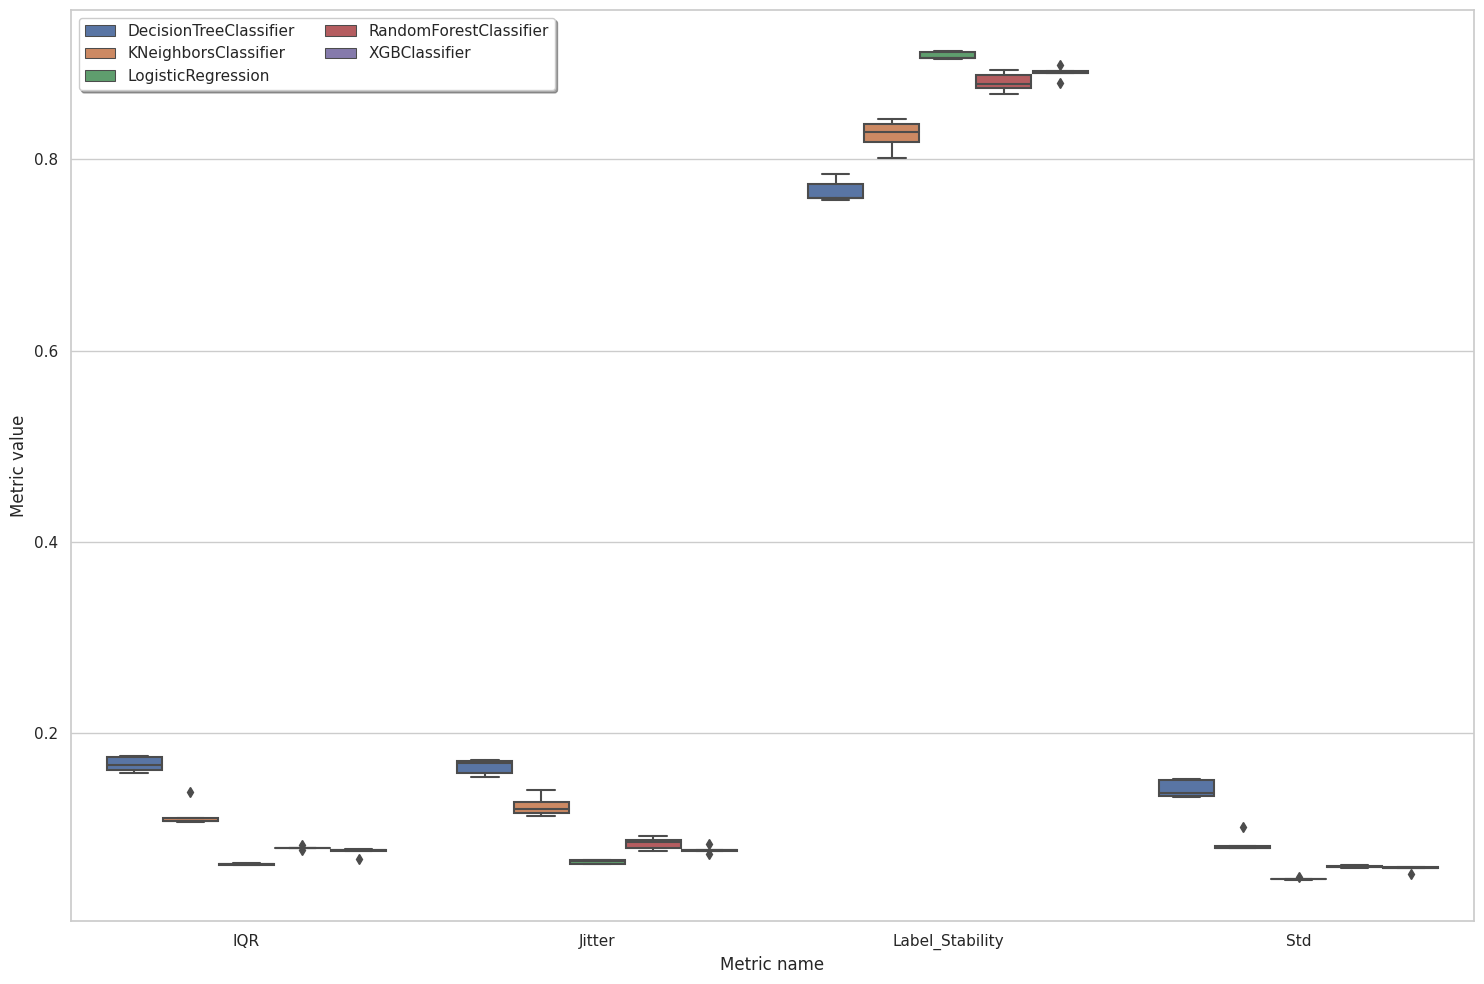

In [46]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

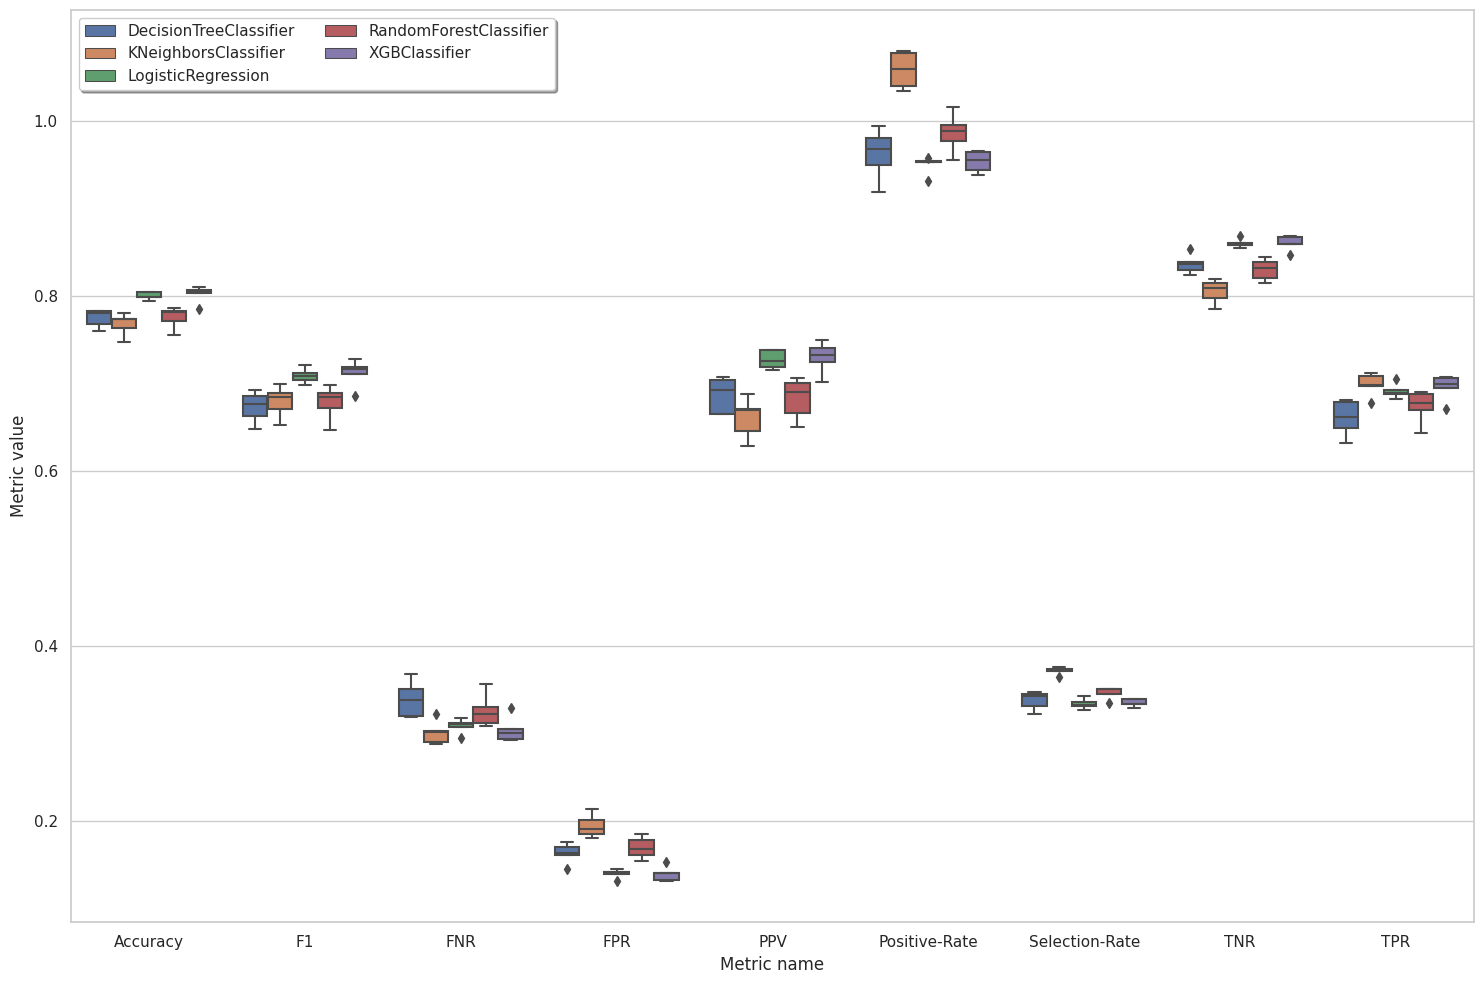

In [47]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

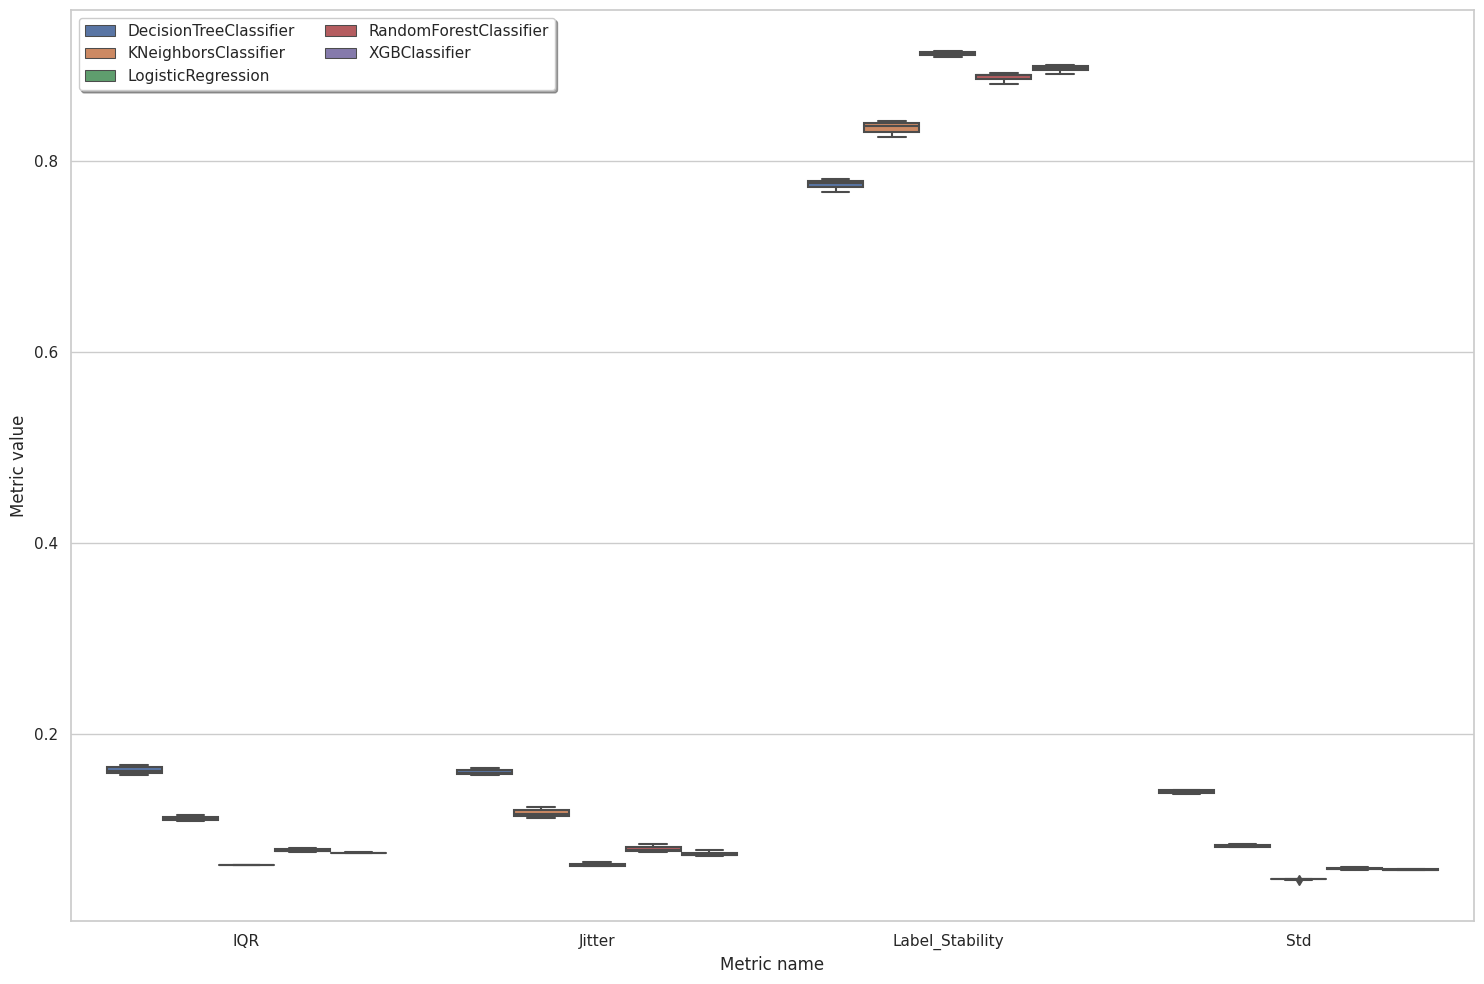

In [48]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

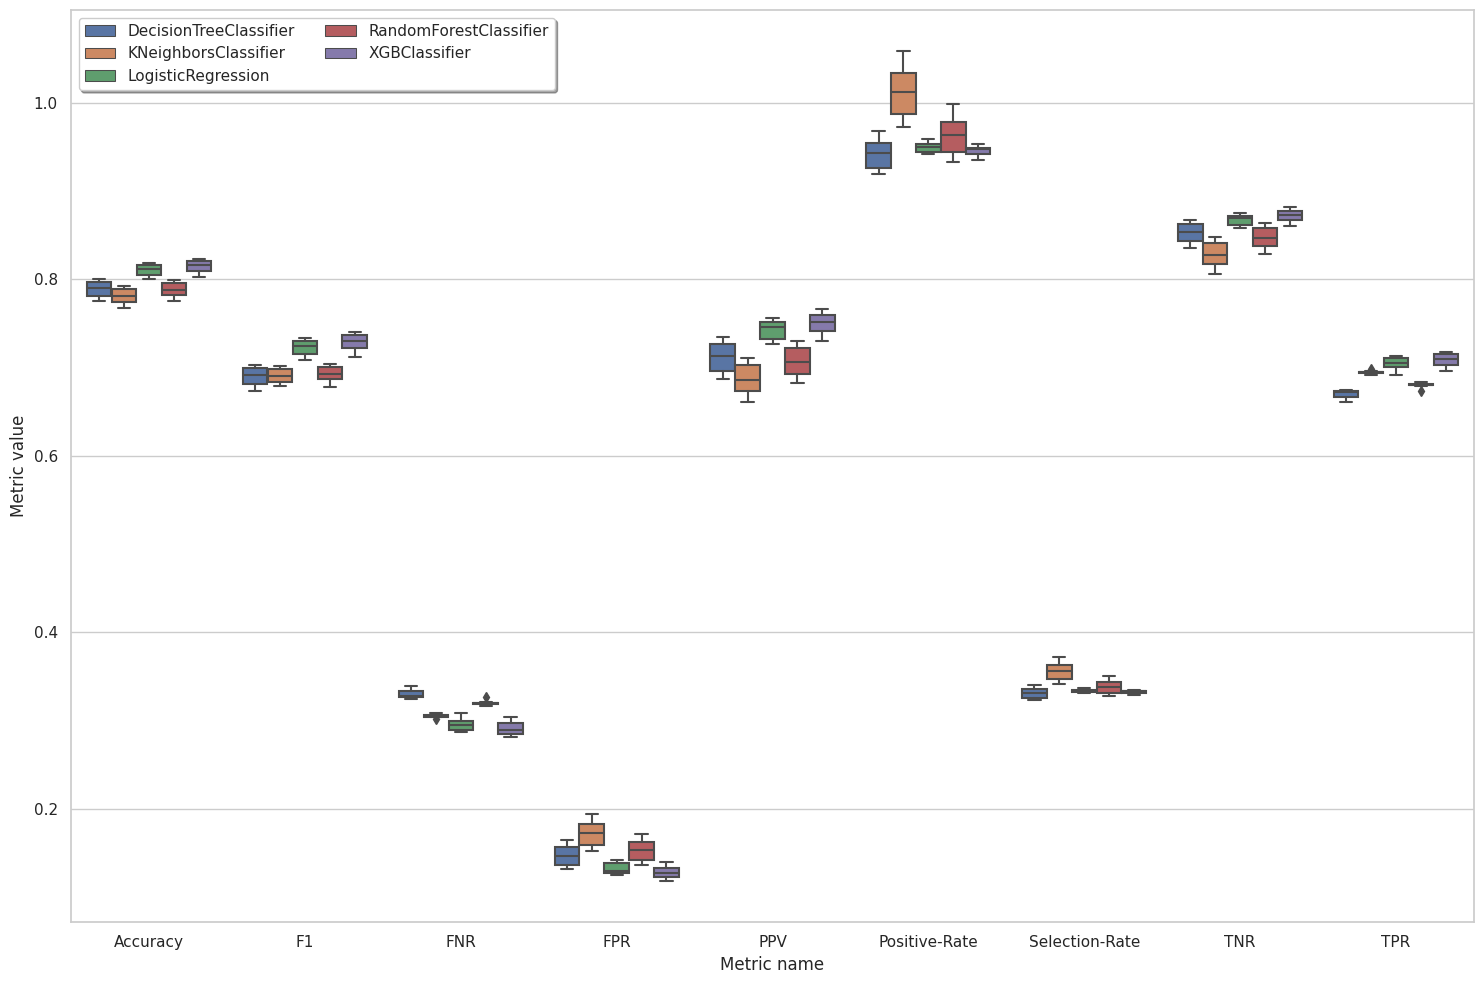

In [49]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

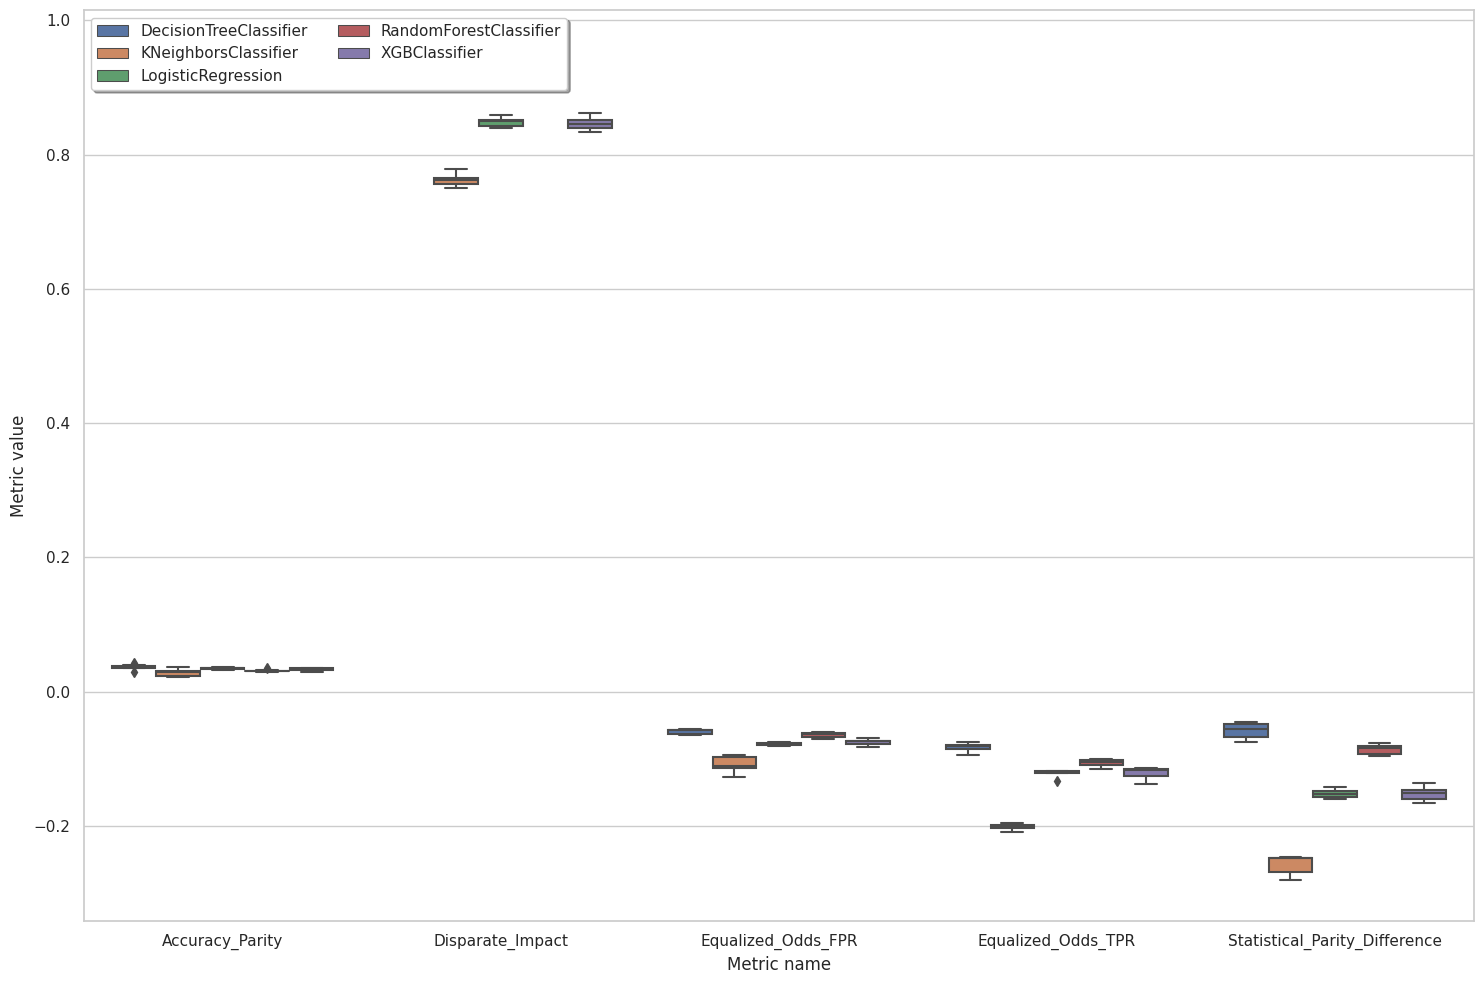

In [50]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='RAC1P',
                                                                  group_metrics_type='fairness')

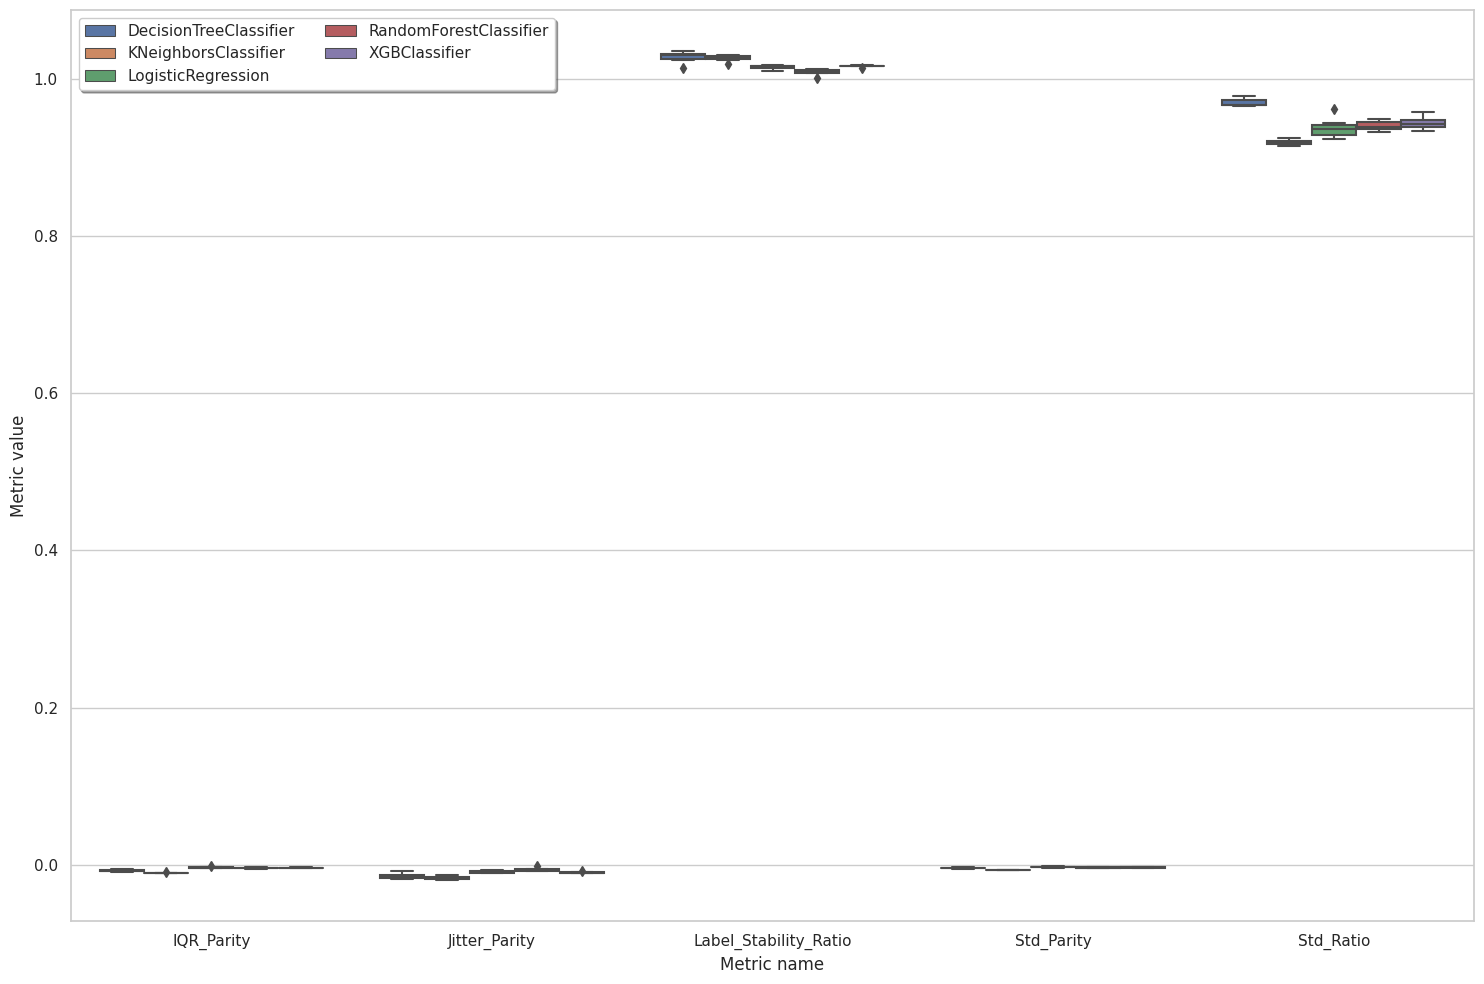

In [51]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='RAC1P',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

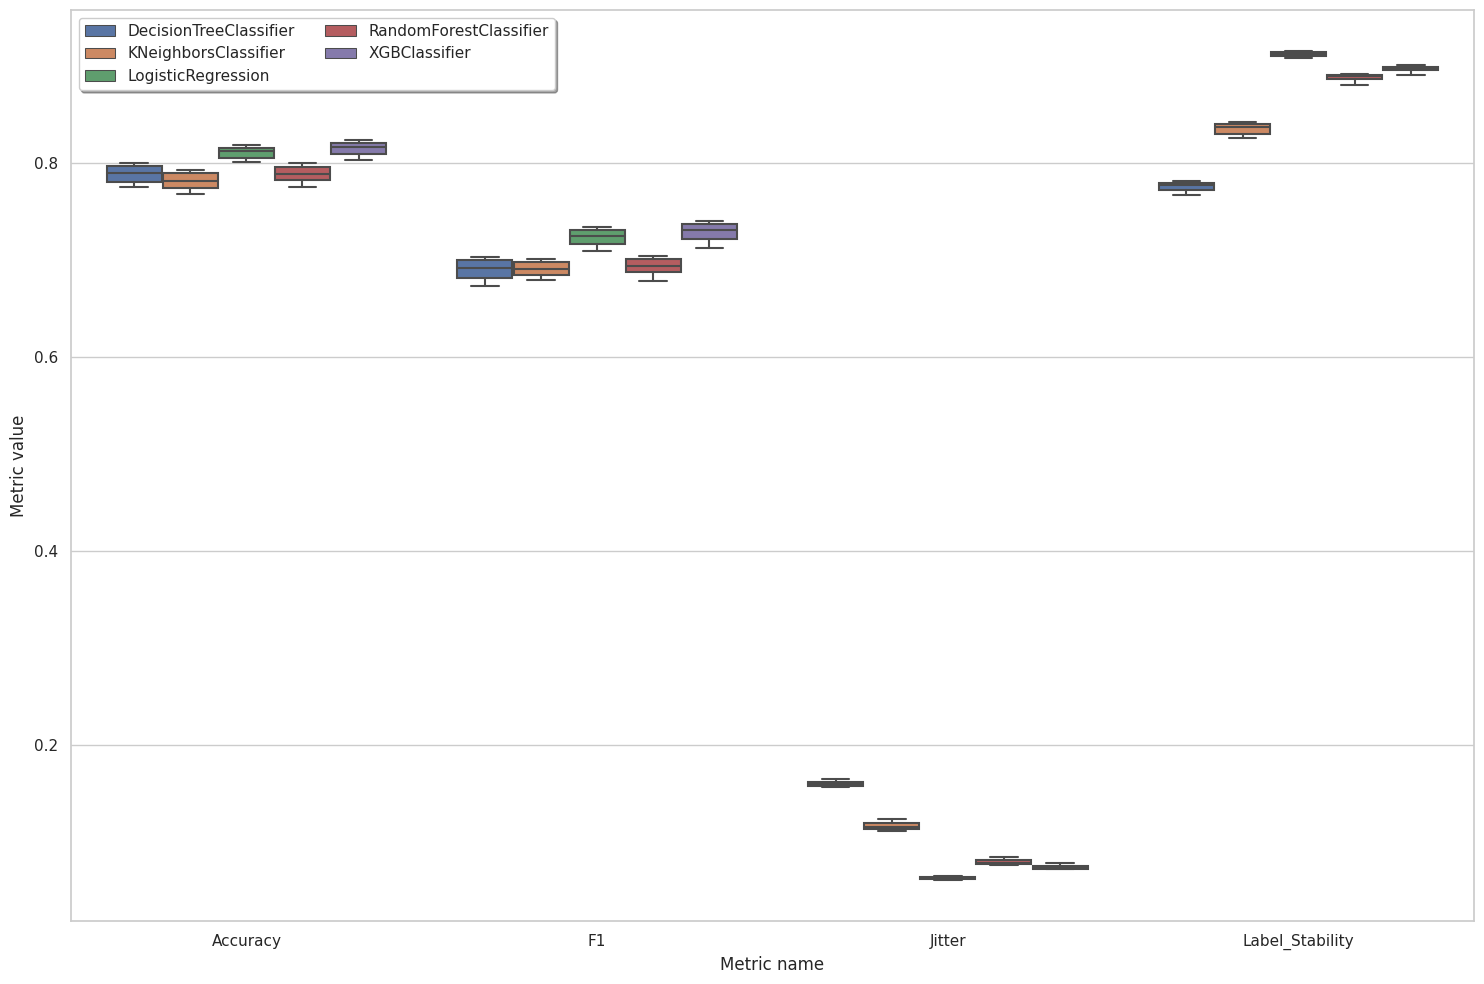

In [52]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'])